/var/folders/z6/jfwxx5l56gbfrgtlqk3b8bk40000gn/T/ipykernel_98663/3755558978.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  roots.append(1/root - 1)


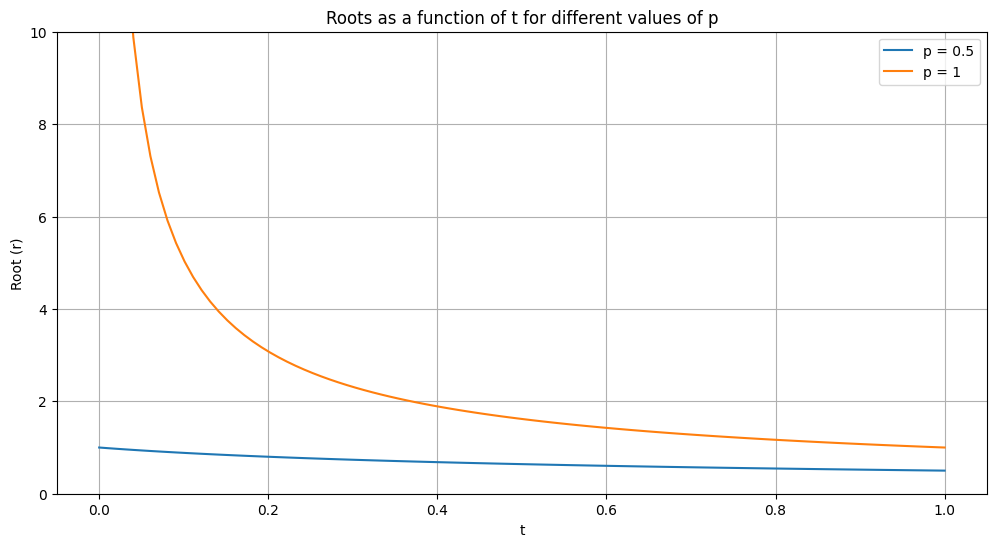

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

# Define NPV and its derivative
def npv(x, p, q, t):
    return -1 + p*(x ** t) + q*x

def npv_prime(x, p, q, t):
    return t*p*(x ** (t-1)) + q

# Define the function to find roots for a given p, q, and range of t values
def find_roots_over_t(p, q, t_values):
    roots = []
    for t in t_values:
        try:
            root = newton(lambda x: npv(x, p, q, t), 0.5, fprime=lambda x: npv_prime(x, p, q, t))
            roots.append(1/root - 1)
        except RuntimeError:
            roots.append(np.nan)  # Append NaN if the solver fails to converge
    return roots

# Set values for q and t range, and calculate roots for different p values
q = 1
t_values = np.linspace(0, 1, 100)  # t values from 0.01 to 1 to avoid division by zero issues

# Calculate roots for p = 0.5 and p = 1.5
p_values = [0.5, 1]
roots_dict = {p: find_roots_over_t(p, q, t_values) for p in p_values}

# Plotting
plt.figure(figsize=(12, 6))
for p, roots in roots_dict.items():
    plt.plot(t_values, roots, label=f'p = {p}')
plt.xlabel('t')
plt.ylabel('Root (r)')
plt.title('Roots as a function of t for different values of p')
plt.legend()
plt.ylim(0, 10)  # Adjust y-limit for clearer view, modify as needed
plt.grid(True)
plt.show()


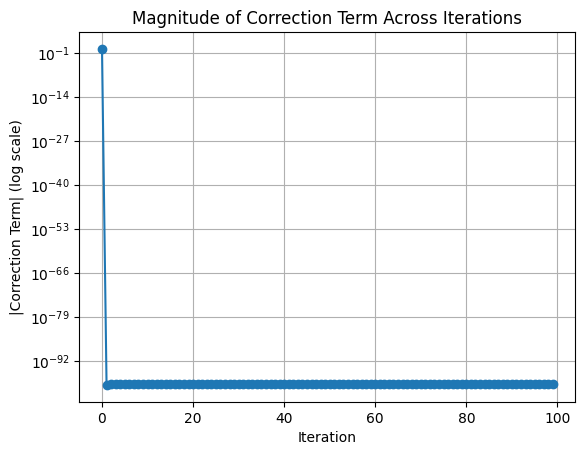

In [9]:
def correction_term(x, p, q, t):
    return npv(x, p, q, t) / npv_prime(x, p, q, t)

# Experiment to track correction term magnitude across iterations
def find_zero_with_tracking(p, q, t, max_iter=100):
    x = 0.5  # initial guess
    corrections = []
    for _ in range(max_iter):
        try:
            corr = correction_term(x, p, q, t)
            corrections.append(abs(corr))
            x = x - corr
        except ZeroDivisionError:
            corrections.append(np.nan)
            break
    return corrections, x

# Example of using the function for small t values
t = 1e-100  # small t
p, q = 2, 1
corrections, x = find_zero_with_tracking(p, q, t)

# Plotting correction term magnitudes across iterations
plt.plot(corrections, marker='o')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('|Correction Term| (log scale)')
plt.title('Magnitude of Correction Term Across Iterations')
plt.grid(True)
plt.show()


In [11]:
1/x - 1

(-2+6.283185307179586e-100j)